In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer,load_iris
#data=load_breast_cancer()
data=load_iris()
df=pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['target']=data['target']


In [3]:
class k_means:
    def __init__(self,data,k,target_name,random_seed=69) -> None:
        self.data = data.drop(columns=[target_name])
        self.targets=data[target_name]
        self.k=k
        self.centroids=[]
        count=0
        while count<k:
            np.random.RandomState(seed=random_seed)
            data_point=list(data.iloc[np.random.randint(low=0,high=len(data))])
            if data_point not in self.centroids:
                self.centroids.append(data_point)
                count+=1
        print(self.centroids)
        #self.centroids=np.array(self.centroids)



    def fit(self):
        data_in_use=self.data.copy()
        #print(data_in_use.to_numpy(),np.array(self.centroids))
        prev_centroids=self.centroids[:]
        i=0
        while self.centroids!=prev_centroids or i==0:
            if(i!=0):
                prev_centroids=self.centroids
            cur_centroids=[]
            op1=data_in_use.to_numpy()[:,None]
            op2=np.array(self.centroids)
            #print(op1.shape)
            #print(op2.shape)
            #print(np.subtract(op1,op2).shape)
            dist=np.linalg.norm(np.subtract(op1,op2),axis=2)
            classified=np.array(np.argmin(dist,axis=1))[:,None]
            #print(classified.shape)
            for i in range(self.k):
                updated_centroid=list(np.mean(data_in_use.to_numpy(),where=(classified==i),axis=0))
                #print(updated_centroid)
                cur_centroids.append(updated_centroid)
            self.centroids=cur_centroids

            i+=1
        print(self.centroids)

        #while self.centroids!=cur_centroids:
            


In [4]:
model=k_means(df,3,'target')
model.fit()

[[6.1, 3.0, 4.6, 1.4, 1.0], [5.4, 3.0, 4.5, 1.5, 1.0], [5.0, 2.0, 3.5, 1.0, 1.0]]


ValueError: operands could not be broadcast together with shapes (150,1,4) (3,5) 

(330, 3)


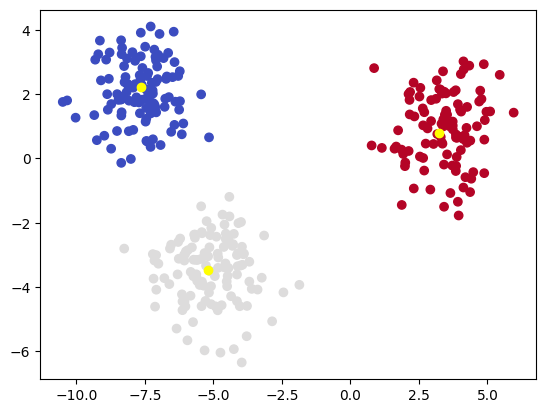

In [36]:
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y=make_blobs(n_samples=1000,n_features=3,random_state=43)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_test.shape)
centroids,labels,inertia=k_means(X_train,n_clusters=3,n_init="auto")


plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap="coolwarm")

plt.scatter(centroids[:,0],centroids[:,1],color="yellow")
